In [16]:
from Bio import Phylo
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

from itertools import combinations

## Ejercicio 1: Análisis de un Árbol Filogenético Existente

El árbol filogenético a analizar fue construido utilizando un conjunto de secuencias genéticas correspondientes a la subunidad beta 1 de la hemoglobina, una proteína fundamental para el transporte de oxígeno en organismos vertebrados. Este árbol representa las relaciones evolutivas entre diferentes especies, agrupándolas en clados basados en la similitud genética de sus secuencias. Las especies incluidas abarcan una diversidad taxonómica considerable, destacando representantes de peces, aves y mamíferos.

Entre las especies representadas se encuentran organismos acuáticos como **Cyprinus carpio** (carpa común) y **Salmo salar** (salmón atlántico), que reflejan adaptaciones específicas a entornos acuáticos. También se incluyen aves como **Gallus gallus** (pollo doméstico) y **Taeniopygia guttata** (pinzón cebra), cuyas secuencias genéticas destacan por adaptaciones metabólicas asociadas al vuelo. En el grupo de los mamíferos, el árbol incluye especies como **Homo sapiens** (humano), **Mus musculus** (ratón), y **Bos taurus** (vaca), que aportan información sobre la evolución de la hemoglobina en contextos terrestres y metabólicamente diversos.

El árbol fue construido mediante un alineamiento de secuencias realizado con **CLUSTALW**, que permitió identificar regiones conservadas y divergentes en las secuencias de hemoglobina entre las especies. Posteriormente, el árbol fue visualizado y analizado con la herramienta **iTOL**, lo que facilita observar patrones evolutivos y divergencias entre los linajes. Este árbol es una herramienta clave para explorar las trayectorias evolutivas de la hemoglobina y las adaptaciones específicas que han surgido en distintos grupos de organismos.

In [74]:
def analyze_tree(newick_file):
    tree = Phylo.read(newick_file, "newick")
    
    num_terminals = len(tree.get_terminals())
    num_clades = len(list(tree.find_clades()))
    branch_lengths = [clade.branch_length for clade in tree.find_clades() if clade.branch_length is not None]  # Longitudes de las ramas
    terminal_names = [terminal.name for terminal in tree.get_terminals()]
    
    clades_with_bootstrap = [(clade.confidence, clade) for clade in tree.find_clades() if clade.confidence is not None]
    best_bootstrap, best_clade = (None, None)
    if clades_with_bootstrap:
        best_bootstrap, best_clade = max(clades_with_bootstrap, key=lambda x: x[0])
    
    min_distance, closest_pair = float('inf'), None
    for (name1, name2) in combinations(terminal_names, 2):
        distance = tree.distance(name1, name2)
        if distance < min_distance:
            min_distance = distance
            closest_pair = (name1, name2)
    
    max_distance, most_distant_species = float('-inf'), None
    for name in terminal_names:
        total_distance = sum(tree.distance(name, other) for other in terminal_names if other != name)
        if total_distance > max_distance:
            max_distance = total_distance
            most_distant_species = name
    
    print(f"Información del árbol filogenético:")
    print(f"Número de terminales: {num_terminals}")
    print(f"Número de nodos/clados totales: {num_clades}")
    print(f"Longitudes de las ramas: {branch_lengths}")
    print(f"Nombres de terminales: {terminal_names}")

    if best_clade:
        print(f"Clado con el mejor bootstrap: {best_bootstrap}")

    if closest_pair:
        print(f"Especies más parecidas: {closest_pair} con distancia {min_distance}")
        
    if most_distant_species:
        print(f"Especie más distante al resto: {most_distant_species} con distancia total {max_distance}")
    
    return tree, closest_pair, most_distant_species

In [75]:
newick_file = "./data/hbb_tree.txt"
tree, closest_pair, most_distant_species = analyze_tree(newick_file)

Información del árbol filogenético:
Número de terminales: 22
Número de nodos/clados totales: 42
Longitudes de las ramas: [0.205701, 1.13866, 0.031261, 0.136879, 0.133087, 0.230584, 0.190835, 0.0953875, 0.162102, 0.28055, 0.0278707, 0.0186001, 0.0572805, 0.241457, 0.0286879, 0.0473548, 0.0106191, 0.00200754, 0.0021201, 0.00865119, 0.00195866, 0.0066246, 0.00852267, 5e-09, 0.0, 0.0, 0.0230908, 0.0215049, 0.00236303, 0.0103989, 0.012181, 0.0269614, 0.00456229, 0.00824827, 0.0273313, 0.00829855, 0.00242122, 0.023679, 0.00222634, 0.00210352, 0.00853381]
Nombres de terminales: ['AB364477.1', 'MZ593243.1', 'BT074827.1', 'BT082972.1', 'MT164172.1', 'NM_001160555.2', 'BT059665.1', 'OL804561.1', 'KX241110.1', 'KX241171.1', 'KX241173.1', 'KX241147.1', 'KX241132.1', 'KX241142.1', 'KX241189.1', 'KX241204.1', 'KX241222.1', 'KX241216.1', 'KX241252.1', 'KX241297.1', 'KX241301.1', 'KX241309.1']
Especies más parecidas: ('KX241132.1', 'KX241142.1') con distancia 0.0
Especie más distante al resto: MZ59324

El árbol filogenético analizado contiene un total de 22 terminales, que representan las especies o secuencias individuales, y 42 nodos o clados en total. Las longitudes de las ramas varían significativamente, lo que refleja diferentes niveles de divergencia evolutiva entre las especies representadas. Estas longitudes oscilan entre valores cercanos a 0.0 y hasta un máximo de 1.13866, lo que indica una amplia diversidad evolutiva en las relaciones del árbol.

En términos de proximidad evolutiva, las especies más cercanas son **KX241132.1** y **KX241142.1**, que presentan una distancia de 0.0, lo que sugiere una similitud extremadamente alta o incluso identidad completa en las métricas del árbol. Por otro lado, la especie más distante al resto es **MZ593243.1**, con una distancia total acumulada de 29.5649, lo que indica un alto grado de diferenciación evolutiva en comparación con las demás especies.

Este análisis evidencia tanto las relaciones estrechas como las divergencias significativas entre las especies representadas en el árbol, proporcionando una visión integral de la diversidad evolutiva y las posibles trayectorias de divergencia entre estas secuencias.

### Visualización de un Árbol Filogenético

In [76]:
def plot_tree(tree, color_dict=None, branch_width=2):
    if color_dict:
        for clade in tree.find_clades():
            if clade.name in color_dict:
                clade.color = color_dict[clade.name]

    def color_func(clade):
        return getattr(clade, "color", "black")

    plt.figure(figsize=(15, 8))
    ax = plt.gca()

    Phylo.draw(tree, axes=ax, branch_labels=None, label_colors=color_func, do_show=False)

    for line in ax.findobj(match=lambda obj: isinstance(obj, plt.Line2D)):
        line.set_linewidth(branch_width)

    plt.title("Árbol Filogenético de la Subunidad Beta de la Hemoglobina")
    plt.show()


In [77]:
color_dict = {closest_pair[0]: 'blue', closest_pair[1]: 'blue', most_distant_species: 'red'}

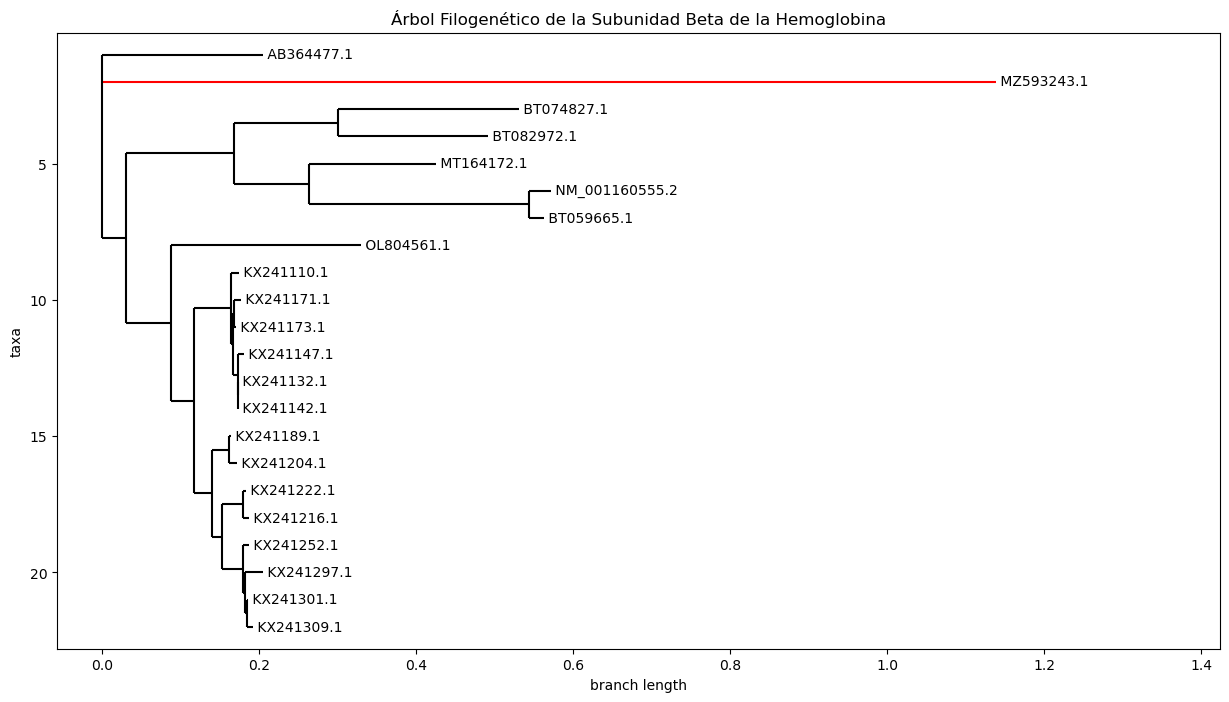

In [78]:
plot_tree(tree, color_dict)

En efecto, se puede apreciar en el gráfico cómo la especie **MZ593243.1** sí parece ser la más distante en términos evolutivos, ya que su rama es significativamente más larga en comparación con las demás, lo que visualmente refuerza la conclusión de que pertenece a un linaje altamente diferenciado. Por el contrario, las especies **KX241132.1** y **KX241142.1** aparecen agrupadas en el mismo nodo, con una rama de longitud nula que confirma su extrema similitud genética o identidad.

Además, el gráfico muestra clados más compactos, como el que incluye las especies del grupo **KX241***, lo que refleja una menor divergencia evolutiva entre ellas. Esto contrasta claramente con las separaciones más profundas observadas en especies como **MZ593243.1** o incluso **BT074827.1**, cuya posición también sugiere una moderada divergencia con respecto a las demás terminales. En conjunto, el gráfico complementa lo descrito anteriormente, evidenciando de forma clara tanto las relaciones cercanas como las divergencias significativas presentes en el árbol filogenético.